# Problem 1. Linear Discriminant Analysis 

## Importing Libraries

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Reading the dataset

In [78]:
dataset = pd.read_csv('/Users/dakshbhuva/Downloads/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Extracting only required columns

In [79]:
cols_to_use = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
dataset = dataset[cols_to_use]
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## X is the 4 features of the dataset and y is output 'species'

In [80]:
dvalues = dataset.values
X, y = dvalues[:, :-1], dvalues[:, -1]
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Implementing LDA on whole dataset 

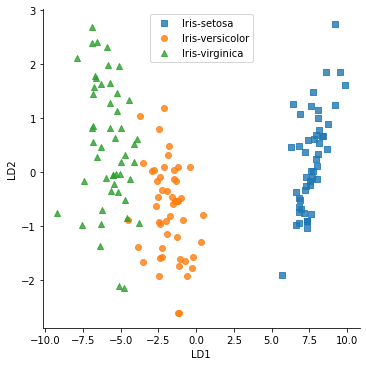

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components = 2)
# fitting the LDA model where X are the features of the Iris Dataset and y is output(or 'species')
X_values = LDA.fit(X,y)
# By tranforming, from LinearDiscriminantAnalysis we get LD1 and LD2
X_values = X_values.transform(X)
#print(X_values)
# making new dataframe with LD1, LD2 and output 'species'
LDA_new = pd.DataFrame(X_values)
LDA_new['species'] = y
#print(LDA_new)
LDA_new.columns=["LD1","LD2","species"]
# plotting LD1 vs LD2
markers = ['s', 'o', '^']
sns.lmplot(x="LD1", y="LD2", data = LDA_new, hue = 'species', markers = markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()

# Now implementing LDA for each pair of the classes

## Making pairs of the given 3 types of species

In [82]:
class_names = dataset['Species'].unique()

grouped = dataset.groupby('Species')

# s1,s2,s3 contain datasets of class types 1,2,3 respectively
s1 = grouped.get_group(class_names[0])
s2 = grouped.get_group(class_names[1])
s3 = grouped.get_group(class_names[2])

# pairing datasets to perform LDA pairwise
first_and_second = s1.append(s2)
second_and_third = s2.append(s3)
first_and_third = s1.append(s3)

## Importing the LDA model

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA= LinearDiscriminantAnalysis(n_components = 1)

## For species 1 and 2:

### X is the 4 features of the dataset and y is output 'species'

In [84]:
X = first_and_second[first_and_second.columns[0:4]]
y = first_and_second[first_and_second.columns[4]]

### Training, Testing and Accuracy of the model

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
print('Accuracy score:')
accuracy_score(y_test,y_pred)

Accuracy score:


1.0

## For species 2 and 3:

### X is the 4 features of the dataset and y is output 'species'

In [86]:
X = second_and_third[second_and_third.columns[0:4]]
y = second_and_third[second_and_third.columns[4]]

### Training, Testing and Accuracy of the model

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
print('Accuracy score:')
accuracy_score(y_test,y_pred)

Accuracy score:


0.92

## For species 1 and 3:

### X is the 4 features of the dataset and y is output 'species'

In [88]:
X = first_and_third[first_and_third.columns[0:4]]
y = first_and_third[first_and_third.columns[4]]

### Training, Testing and Accuracy of the model

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
print('Accuracy score:')
accuracy_score(y_test,y_pred)

Accuracy score:


1.0